# Fun with maps, part 3

After map images have been filtered, run *object detection* to find interesting shapes.

# Dependencies

In [3]:
#r "nuget: Microsoft.Azure.CognitiveServices.Vision.ComputerVision"

Installed Packages Microsoft.Azure.CognitiveServices.Vision.ComputerVision, 7.0.1

In [4]:
using System.IO;
using Microsoft.Azure.CognitiveServices.Vision.ComputerVision;
using Microsoft.Azure.CognitiveServices.Vision.ComputerVision.Models;

using static Microsoft.DotNet.Interactive.Formatting.PocketViewTags;

var random = new Random();

## Step 3: Run object detection on images

The project will be using [Azure computer vision](https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/) service to try and detect object shapes.

### Configuration

Create an [Azure computer vision account](https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/quickstarts-sdk/image-analysis-client-library#prerequisites) and get the primary key and endpoint for that account.

In [1]:
var azureComputerVisionEndpoint = "<your-account-endpoint>";
var azureComputerVisionApiKey = "<your-account-api-key>";


 ### List images from Step 2

In [5]:
var sourceImageFolder = "output/step2";

var sourceImages = Directory.GetFiles(sourceImageFolder).Where(file => file.EndsWith("png")).ToList();

display($"{sourceImages.Count} source images found, displaying name of first 10");
display(sourceImages.Take(10));

13 source images found, displaying name of first 10

index,value
0,output/step2/7__-44.09199878518183__-10.70419321897623.png
1,output/step2/10__-64.55468161335037__-2.9182961324561205.png
2,output/step2/7__16.61484365251573__65.75746996780518.png
3,output/step2/5__10.463813197673034__28.507208398236116.png
4,output/step2/5__-65.46187477452636__55.55732591265934.png
5,output/step2/7__99.49382073425818__47.227614216918255.png
6,output/step2/7__-78.42469881663138__51.12085327304665.png
7,output/step2/6__-50.39518539971667__-13.357418071831276.png
8,output/step2/12__-55.786226002796795__-24.292396693042583.png
9,output/step2/5__36.77104961194604__16.00206824991065.png


### Authenticate with Azure computer vision

In [6]:
var computerVisionClient = new ComputerVisionClient(
	new ApiKeyServiceClientCredentials(azureComputerVisionApiKey))
	{
		Endpoint = azureComputerVisionEndpoint
	};

## Analyze image

Configure the features to be extracted from the image. 

In [7]:
var visualFeatureTypes = new List<VisualFeatureTypes?>()
{
	VisualFeatureTypes.Objects
};

Then load an image in memory and run *object detection* on that image with the selected features.


In [30]:
var someImage = sourceImages.Skip(random.Next(sourceImages.Count)).First();

ImageAnalysis results;
using (var imageStream = new FileStream(someImage, FileMode.Open)) {
	results = await computerVisionClient.AnalyzeImageInStreamAsync(imageStream, visualFeatures: visualFeatureTypes);
}

output/step2/5__-65.46187477452636__55.55732591265934.png index Rectangle ObjectProperty Confidence Parent 0 X Y W H 1 0 254 256 Office supplies 0.584 <null>
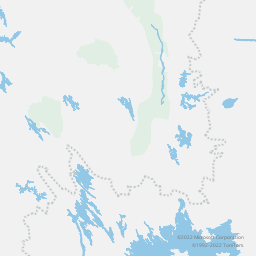

In [31]:
display(
	table(
		caption(someImage),
		tr(
			td(img[src: "data:image/png;base64," + Convert.ToBase64String(File.ReadAllBytes(someImage)), width: "50%"]),
			td(results.Objects)
		)
	)
)